In [10]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from multi_layer_model.multi_layer_funcs import *
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from model import NeuralNet

In [11]:
# Load data
df = pd.read_csv('./nr-ar.smiles', sep='\t', header=None).dropna()

# Rename columns
df.columns = ['Smiles', 'ID', 'Active']

# Add fingerprints
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize = 2048)
df['mol'] = df.Smiles.apply(Chem.MolFromSmiles)
df.dropna(inplace = True)
df['fingerprint'] = df.mol.apply(lambda x: np.array(mfpgen.GetFingerprint(x)))


[21:06:56] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[21:06:56] Explicit valence for atom # 2 Cl, 1, is greater than permitted
[21:06:56] WARNING: not removing hydrogen atom without neighbors


In [30]:
X_train = np.array(df.fingerprint.to_list()[0:int(len(df)*0.8)])
y_train = np.array(df.Active.to_list()[0:int(len(df)*0.8)])

In [31]:
nn = NeuralNet()

In [32]:
nn.fit(X_train, y_train)

0 / 200
10 / 200
20 / 200
30 / 200
40 / 200
50 / 200
60 / 200
70 / 200
80 / 200
90 / 200
100 / 200
110 / 200
120 / 200
130 / 200
140 / 200
150 / 200
160 / 200
170 / 200
180 / 200
190 / 200


In [37]:
X_test = np.array(df.fingerprint.to_list()[int(len(df)*0.5):])
y_test = np.array(df.Active.to_list()[int(len(df)*0.5):])

probs = nn.predict(X_test)

In [38]:
preds = (probs >= 0.5).astype(int)

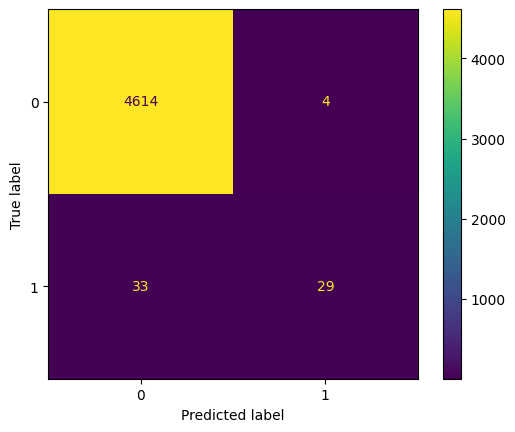

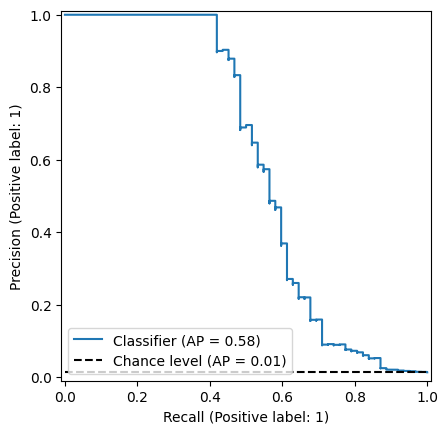

In [39]:
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, auc, precision_recall_curve

ConfusionMatrixDisplay.from_predictions(y_test, preds)
PrecisionRecallDisplay.from_predictions(y_test, probs, plot_chance_level=True)